<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/Iterative_Phase_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [ ]:
import os
from typing import Any, List, Dict, Union

import numpy as np
import matplotlib.pyplot as plt

from qiskit import (
    Aer,
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    transpile,
    execute,
)
from qiskit.tools.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider

import warnings

warnings.filterwarnings("ignore")

pi = np.pi

In [ ]:
# define backend to request
# Note: This can be any hub/group/project that has access to the required device and Qiskit Runtime.
hub = "<hub>"
group = "<group>"
project = "<project>"
backend_name = "<your backend>"
hgp = f"{hub}/{group}/{project}"

hub = "ibm-q-internal"
group = "dev-sys-software"
project = "internal-test"
backend_name = "alt_auckland"
hgp = f"{hub}/{group}/{project}"

In [ ]:
# load backend
provider = IBMProvider()
#backend = provider.get_backend(backend_name, instance=hgp)
backend = Aer.get_backend("aer_simulator")
# backend = least_busy(provider.backends(dynamic_circuits=True))
print(f"Using backend {backend.name}")

Using backend <bound method AerSimulator.name of AerSimulator('aer_simulator')>


In [ ]:
qubits = [0, 1]
shots = 1000

nq = 2
m = 2

In [ ]:
qr = QuantumRegister(2, "q")
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
qc_S = QuantumCircuit(qr, c0, c1)

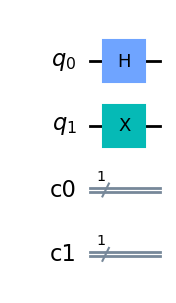

In [ ]:
def initialize_eigenstate(qc):
    """Initialize the eigenstate and prepare our ancilla qubit"""
    qc.h(0)
    qc.x(1)


initialize_eigenstate(qc_S)
qc_S.draw("mpl")


In [ ]:
theta = 1 * np.pi / 2

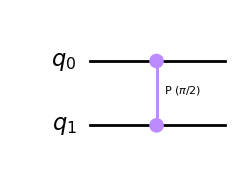

In [ ]:
cu_circ = QuantumCircuit(2)
cu_circ.cp(theta, 0, 1)
cu_circ.draw("mpl")


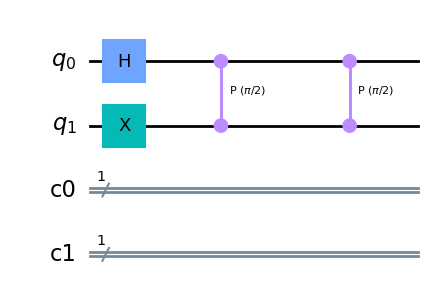

In [ ]:
for _ in range(2 ** (m - 1)):
    qc_S.cp(theta, 0, 1)
qc_S.draw("mpl")

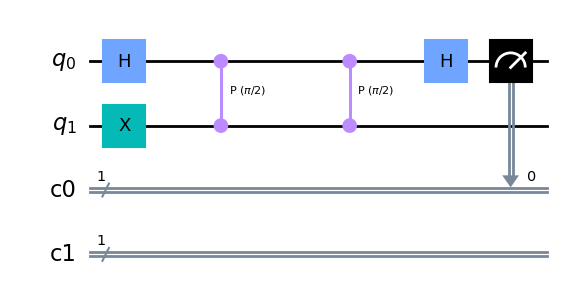

In [ ]:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)


x_measurement(qc_S, qr[0], c0)
qc_S.draw("mpl")

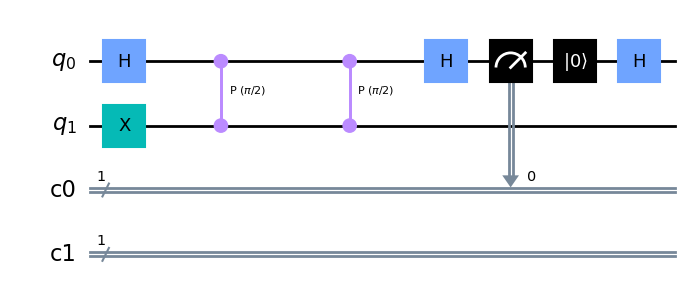

In [ ]:
def reset_auxiliary(qc):
    qc.reset(0)
    qc.h(0)


reset_auxiliary(qc_S)
qc_S.draw("mpl")


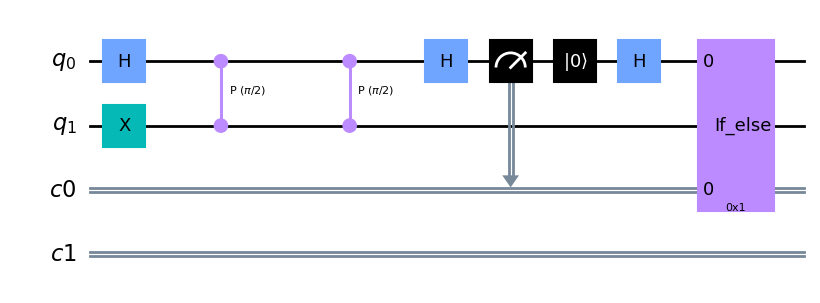

In [ ]:
with qc_S.if_test((c0, 1)):
    qc_S.p(-np.pi / 2, 0)
qc_S.draw("mpl")

In [ ]:
## 2^t c-U operations (with t=m-2)
for _ in range(2 ** (m - 2)):
    qc_S.cp(theta, 0, 1)

x_measurement(qc_S, qr[0], c1)

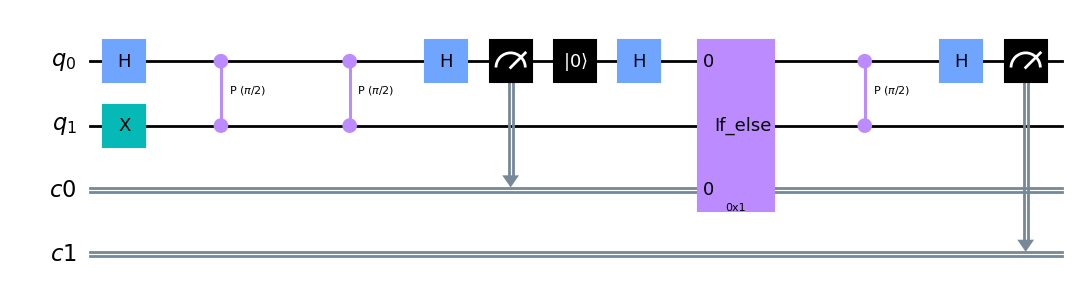

In [ ]:
qc_S.draw("mpl")

In [ ]:
count = execute(qc_S, backend).result().get_counts()
count

{'0 1': 1024}

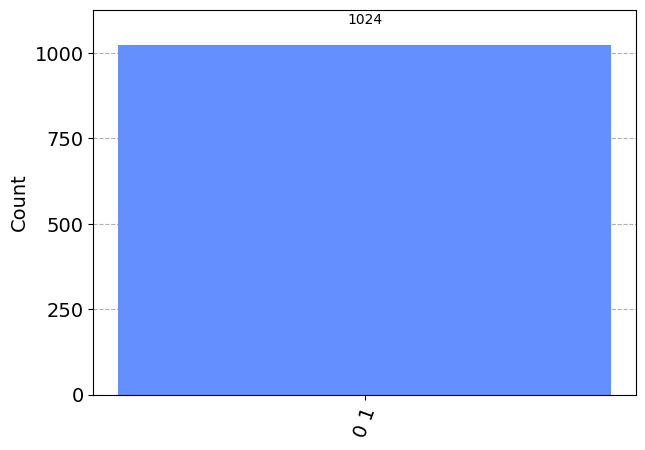

In [ ]:
count0 = execute(qc_S, backend).result().get_counts()
plot_histogram(count0)

In [ ]:
count0

{'0 1': 1024}